In [2]:
pip install librosa pydub


Note: you may need to restart the kernel to use updated packages.


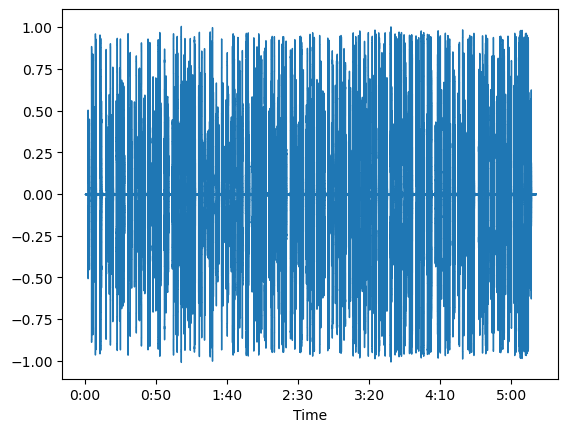

In [7]:
import librosa
import librosa.display

y, sr = librosa.load('01 冬節來府城食「菜包」.wav')
librosa.display.waveshow(y, sr=sr)

TypeError: slice indices must be integers or None or have an __index__ method

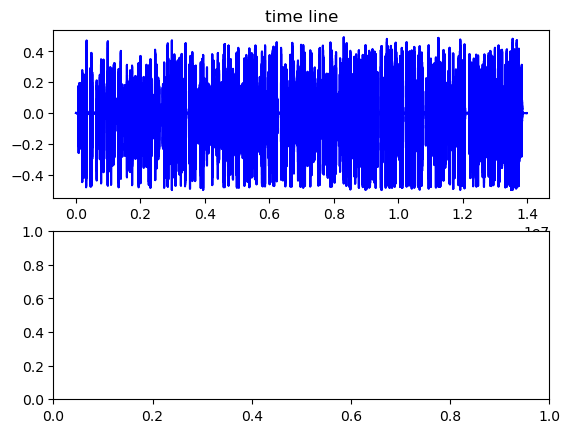

In [9]:
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile # get the api
import numpy as np
from scipy import signal
import math
import pyaudio
import wave
import time
#buf=[]
 
#讀入單一檔案測試
def init():
    fs, data = wavfile.read('01 冬節來府城食「菜包」.wav') # load the data
    b=[(ele/2**16.) for ele in data] # this is 16-bit track, b is now normalized on [-1,1)
    c = fft(b) # calculate fourier transform (complex numbers list)
    d = len(c)/2  # you only need half of the fft list (real signal symmetry)
    plt.subplot(211)
    plt.plot(b,'b')
    plt.title('time line')
    plt.subplot(212)
    plt.plot(abs(c[:(d-1)]),'r')
    plt.title('fft') 
    plt.show()
    return fs, b    #取樣率 data
 
#轉成頻域
def fft_domyself(b, fs, plotshow=None):
    global ftmap
    #set value
    one_second_block_num = 21*2                   #one second 擷取次數
    second = len(b)/44100
    second_len = int(one_second_block_num*second)
    fft_num = int(fs/one_second_block_num)        #one second 間格點數 #2100
    ftmap = np.zeros((int(fft_num/2),second_len)) #建立fft陣列的圖片大小  
    startime = 0#362000
 
    #轉成fft 並儲存在fft陣列
    for i in range(0,second_len):
        endtime = startime + fft_num
        ffttemp = abs(fft(b[startime:endtime]))
        ftmap[0:fft_num,i] = ffttemp[0:int(len(ffttemp)/2)]
        startime = endtime
 
    #做20log()
    for i in range(0, len(ftmap[:,1])):
        for j in range(0, len(ftmap[1,:])):
            try:
                #ftmap[i,j] = 20*math.log10(ftmap[i,j])
                ftmap[i,j] = 20*math.log(ftmap[i,j], 10)
            except:
                #由於 log(0) 輸入0會error
                print('log error with ftmap: ', ftmap[i,j])
        
    ftmap = ftmap + abs(np.min(ftmap))  
    lineft = np.median(ftmap, axis=1)   #用二維的方式，查看頻域的整體資料情況
    
    if plotshow:
        if plotshow == 'linefft':
            plt.plot(lineft, 'b')
            plt.show()
        else:
            
            plt.plot(lineft,'g') 
            plt.show()
            plt.imshow(ftmap)
            plt.xlabel('Frequency [Hz]')
            plt.ylabel('Time [sec]')
            plt.colorbar()
            plt.show()
     
    return ftmap, lineft
 
#使用內建的function將聲音轉成頻域
def spectrogram_(b, fs, plotshow=None):
    #x1 = np.array(b, dtype = float)
    f, t, Sxx = signal.spectrogram(b, fs)    #output 時頻譜
    
    for i in range(0, len(Sxx[:,1])):
        for j in range(0, len(Sxx[1,:])):
            Sxx[i,j] = 20*math.log10(Sxx[i,j])
            #print('do')
    Sxx = Sxx + abs(np.min(Sxx))
    
    if plotshow: 
        plt.pcolormesh(t, f, Sxx)             #draw 時頻譜
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [sec]')
        plt.colorbar()
        plt.show()
    return Sxx
if __name__ == '__main__':
    
    fs, b = init()
    fftmap = fft_domyself(b, fs, plotshow = True)   #自己做的
    sx = spectrogram_(b, fs, plotshow = True)       #內建function

In [10]:
import librosa
librosa.show_versions()

INSTALLED VERSIONS
------------------
python: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]

librosa: 0.10.1

audioread: 3.0.1
numpy: 1.24.3
scipy: 1.11.1
sklearn: 1.3.0
joblib: 1.2.0
decorator: 5.1.1
numba: 0.57.1
soundfile: 0.12.1
pooch: v1.8.0
soxr: 0.3.7
typing_extensions: installed, no version number available
lazy_loader: installed, no version number available
msgpack: installed, no version number available

numpydoc: 1.5.0
sphinx: 5.0.2
sphinx_rtd_theme: None
matplotlib: 3.7.2
sphinx_multiversion: None
sphinx_gallery: None
mir_eval: None
ipython: None
sphinxcontrib.rsvgconverter: None
pytest: 7.4.0
pytest_mpl: None
pytest_cov: None
samplerate: None
resampy: None
presets: None
packaging: 23.1


C:\Users\user\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
